In [7]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt

with open("data/input.json", "r") as f:
    input_data = json.load(f)

image_paths = input_data["image_files"]


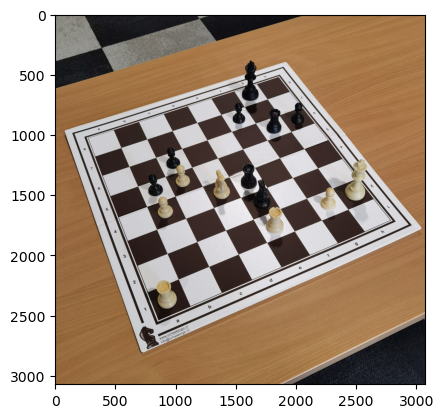

In [8]:
image = cv2.imread(image_paths[0])


gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image) # matplotlib expects RGB format 

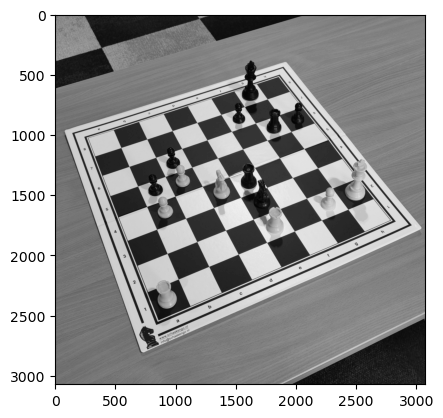

In [9]:
gaussian_blur = cv2.GaussianBlur(gray_image,(5,5),0)

plt.imshow(gaussian_blur,cmap="gray") 

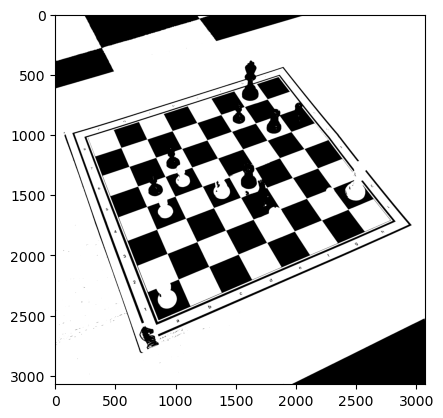

In [10]:
ret,otsu_binary = cv2.threshold(gaussian_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(otsu_binary,cmap="gray")

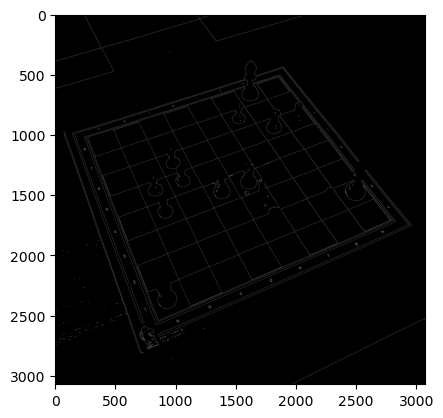

In [11]:
canny = cv2.Canny(otsu_binary,20,255)

plt.imshow(canny,cmap="gray")

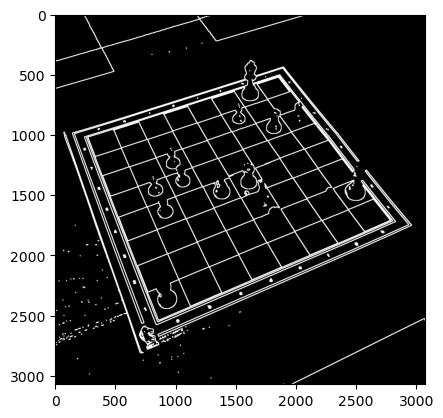

In [12]:
kernel = np.ones((7, 7), np.uint8) 
  
img_dilation = cv2.dilate(canny, kernel, iterations=1) 

plt.imshow(img_dilation,cmap="gray")

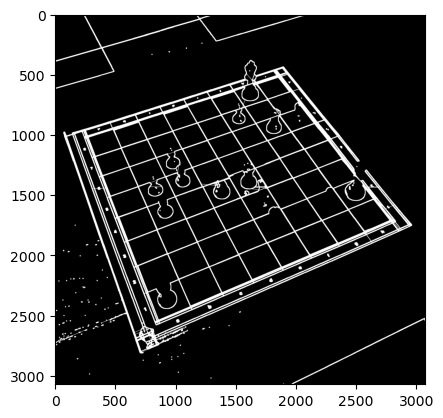

In [13]:
lines = cv2.HoughLinesP(img_dilation, 1, np.pi/180, threshold=200, minLineLength=100, maxLineGap=50)

if lines is not None:
    for i, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]
        
        # draw lines
        cv2.line(img_dilation, (x1, y1), (x2, y2), (255,255,255), 2)

plt.imshow(img_dilation,cmap="gray")

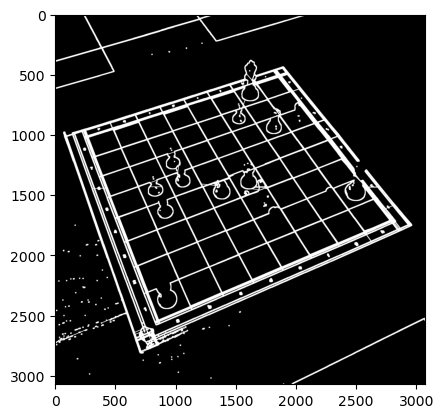

In [14]:
kernel = np.ones((3, 3), np.uint8) 
  
img_dilation_2 = cv2.dilate(img_dilation, kernel, iterations=1) 

plt.imshow(img_dilation_2,cmap="gray")

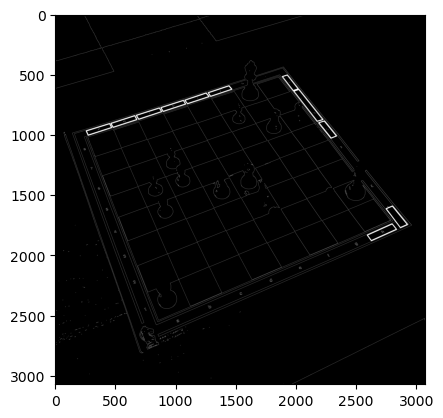

ModuleNotFoundError: No module named 'chessboard_segmentation'